# Knock Airport Weather Analysis

Plot:
- The temperature
- The mean temperature of each day
- The mean temperature of each month
- The windspeed
- The rolling windspeed (over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds

In [47]:
# Import the requred modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Background Information on the Data Set.

The [downloaded csv file](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv) contains hourly weather information for Knock Airport, Co. Mayo, Ireland from April 1996 to October 2024. The data is published by Met Éireann, the meteorological service of Ireland.

This [link](https://cli.fusio.net/cli/climate_data/showdata.php) to view and download weather data for other weather stations. It is possible to download hourly, daily or monthly weather data for the selected station. Each weather station has a unique station name.

The naming system of the csv file reflects the data downloaded. For this file, hly4935.csv, hly indicates hourly data and 4935 is the station code for Knock Airport.

## Loading the CSV File

Difficulties loading the csv file were due to:

- the first 23 rows in the csv file have information on the Knock Weather Station and a description of the column names. This was easily solved using the skiprows parameter of the read_csv() function.
- missing data is indicated with a space, ' '.

The missing data was not read into pandas as NaN as expected. To clean the csv file find and replace in Visual Studio Code was used. Te remove the space, each ', ' (or the regex expression ',\s') was replaced with ','. 

![Find and replace for csv](img\assignment_6_regex.png)

In the pandas, read_csv() [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) I subsequently found an alternative method. Certain values are automatically interpreted as NaN by Pandas. These are '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'None', 'n/a', 'nan' and 'null '. Unfortunately, a space, ' ' is not one of them. The read_csv() function has a parameter, [na_values](https://www.geeksforgeeks.org/use-of-na_values-parameter-in-read_csv-function-of-pandas-in-python/) which allows the user to list additional strings to recognise as NaN. For this csv file, setting na_values = ' ' would mean that the missing values would be automatically recognised as NaN when the data set is loaded.

A third method was detailed in the [Week 7 labs](https://github.com/andrewbeattycourseware/PFDA-courseware/blob/main/labs/lab07.01-regression%20windspeed.pdf) of the Programming for Data Analytics module. This uses the [replace method](https://pandas.pydata.org/docs/reference/api/pandas.Series.replace.html#pandas.Series.replace) as shown below.

```python
# Find all rows in the 'wdsp' column, replace ' ' with np.nan.
df['wdsp'] = df.loc[:, ('wdsp')].replace(' ', np.nan)
```

__Additional References__

https://sparkbyexamples.com/pandas/pandas-replace-blank-values-with-nan/

In [48]:
# Load the Data Set
# Loading only the date, temperature and windspeed columns as these are the columns required to complete the assignment.
# Set the date column as index. 
weather_df = pd.read_csv('data\hly4935.csv', usecols= ['date', 'temp', 'wdsp'], skiprows = 23, index_col= 'date', parse_dates= ['date'], date_format = "%d-%b-%Y %H:%M")
weather_df.head()

,temp,wdsp
date,,
1996-04-10 14:00:00,11.5,0.0
1996-07-31 08:00:00,11.5,0.0
1996-07-31 09:00:00,11.6,0.0
1996-07-31 10:00:00,12.9,0.0
1996-07-31 11:00:00,14.5,0.0


Should I drop the first line? Is the data skewed by having no data from the 10th April to the 31st July? 

In [49]:
# Information on the data set. Data type 
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246930 entries, 1996-04-10 14:00:00 to 2024-10-01 00:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   temp    246930 non-null  float64
 1   wdsp    246880 non-null  float64
dtypes: float64(2)
memory usage: 5.7 MB


In [50]:
# Shape attribute, no of rows and columns in the dataset
weather_df.shape

(246930, 2)

In [51]:
# Find the number of rows with data missing.
weather_df.isna().sum()

temp     0
wdsp    50
dtype: int64

In [52]:
# Only 50 rows with data missing in the windspeed column.
# Drop the rows with missing data
weather_df.dropna(inplace= True)

In [53]:
# Change the data type of the windspeed column to integer. The data in the csv file is recorded as whole numbers.
weather_df['wdsp'] = weather_df['wdsp'].astype('int')

In [54]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246880 entries, 1996-04-10 14:00:00 to 2024-10-01 00:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   temp    246880 non-null  float64
 1   wdsp    246880 non-null  int32  
dtypes: float64(1), int32(1)
memory usage: 4.7 MB


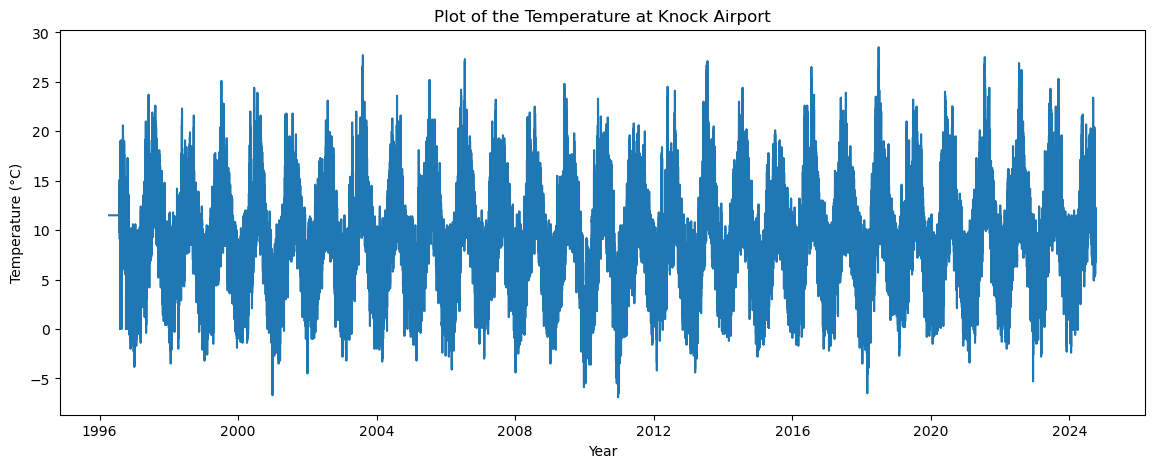

In [55]:
# Task 1: Plot the temperature.
fig, ax = plt.subplots(figsize = (14, 5))

plt.plot(weather_df['temp'])
plt.title('Plot of the Temperature at Knock Airport')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.show()

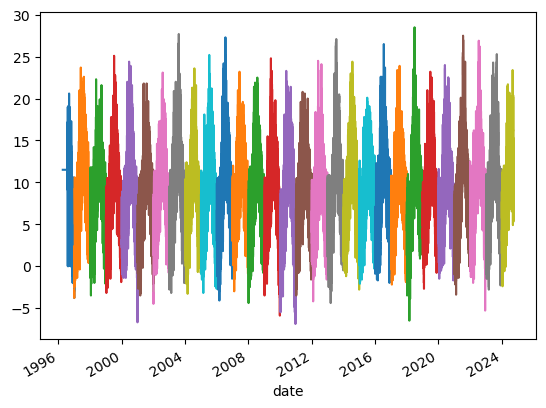

In [56]:

yearly_temperature = weather_df.groupby(weather_df.index.year)['temp'].plot()

As there was no data recorded from 2pm on the 10th April 1996 to the 31st July 1996 thhe first row of data will be dropped as the missing data will affect the mean temperature. 

In [57]:
# Drop the first row.
weather_df.drop('1996-04-10 14:00:00', inplace= True)

Comment on resample() function

In [58]:
# Use resample to the weather_df to daily
daily = weather_df.resample('D')

In [59]:
# Get the mean daily temp.
daily_mean_temp = daily['temp'].mean()
daily_mean_temp

date
1996-07-31    12.650000
1996-08-01    11.704348
1996-08-02    12.504167
1996-08-03    14.266667
1996-08-04    13.987500
                ...    
2024-09-27     8.291667
2024-09-28     8.479167
2024-09-29     9.183333
2024-09-30     9.891667
2024-10-01     8.200000
Freq: D, Name: temp, Length: 10290, dtype: float64

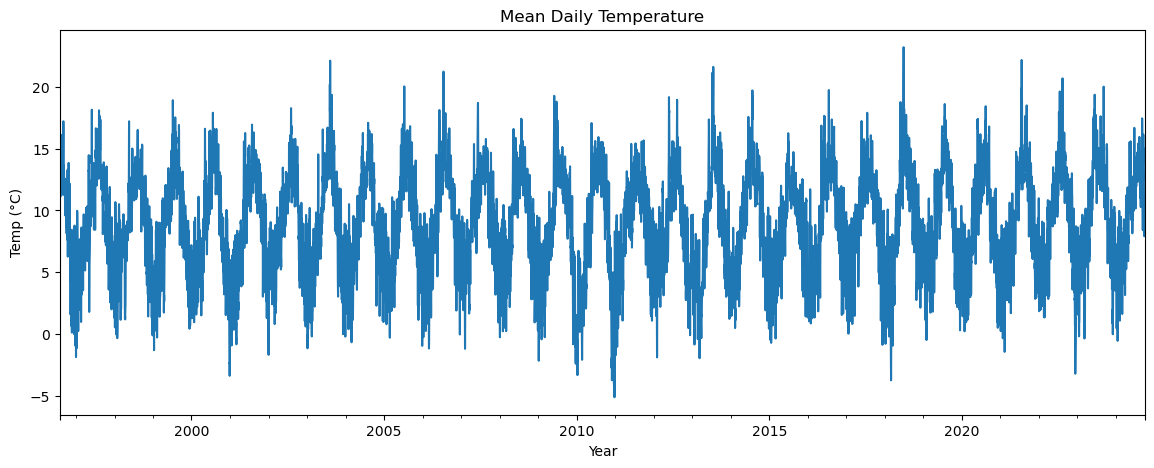

In [60]:
# Plot the daily mean temperature
fig, ax = plt.subplots(figsize = (14, 5))
daily_mean_temp.plot()
plt.xlabel('Year')
plt.ylabel('Temp (°C)')
plt.title('Mean Daily Temperature')
plt.show()

In [61]:
# Resample weather_df on month
monthly = weather_df.resample('ME')

In [62]:
monthly_mean_temp = monthly['temp'].mean()
monthly_mean_temp

date
1996-07-31    12.650000
1996-08-31    12.949798
1996-09-30    12.175104
1996-10-31     9.724929
1996-11-30     4.912117
                ...    
2024-06-30    11.278194
2024-07-31    12.994489
2024-08-31    13.233333
2024-09-30    11.741389
2024-10-31     8.200000
Freq: ME, Name: temp, Length: 340, dtype: float64

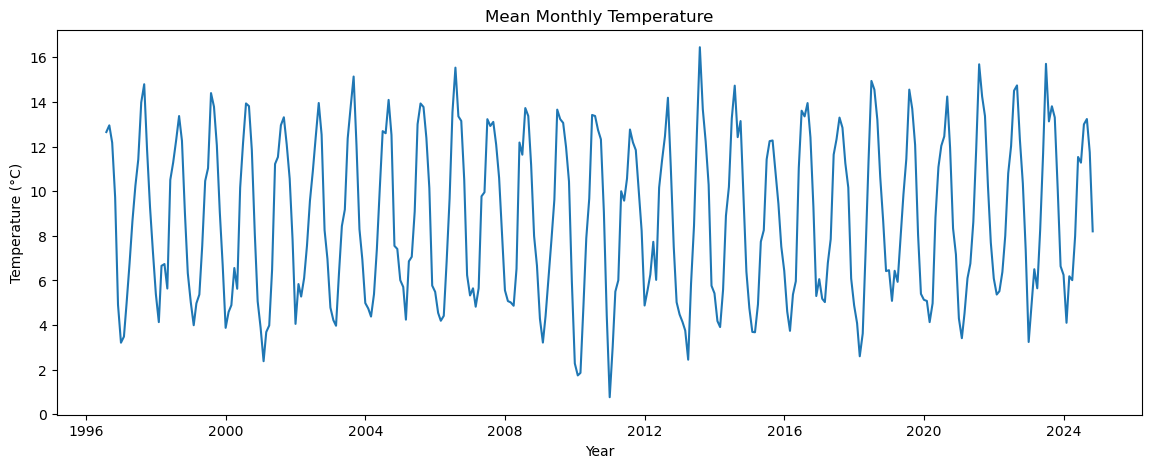

In [63]:
# Mean temperature for each month
fig, ax = plt.subplots(figsize = (14, 5))
plt.plot(monthly_mean_temp)
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Mean Monthly Temperature')
plt.show()

In [64]:
index_month = weather_df.index.month
mean_temp_by_month = weather_df.groupby(index_month)['temp'].mean()
print(mean_temp_by_month)


date
1      4.348502
2      4.686452
3      5.625178
4      7.518934
5     10.212284
6     12.366806
7     13.650432
8     13.561395
9     12.092413
10     9.308653
11     6.488077
12     4.760484
Name: temp, dtype: float64


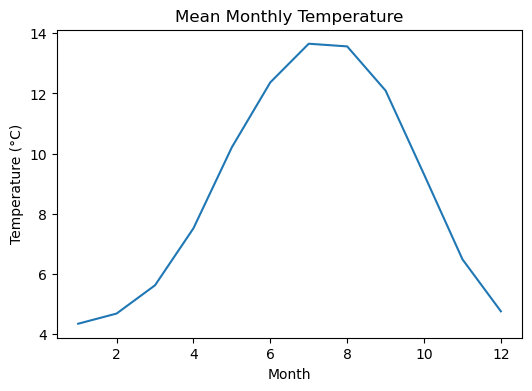

In [65]:
#labels = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

mean_temp_by_month.plot(figsize = (6,4))
plt.xlabel('Month')
#plt.xtick(index_month, labels = labels, rotation = 90)
plt.ylabel('Temperature (°C)')
plt.title('Mean Monthly Temperature')
plt.show()

# https://app.datacamp.com/learn/courses/visualizing-time-series-data-in-python

In [66]:
index_year = weather_df.index.year
mean_temp_by_year = weather_df.groupby(index_year)['temp'].mean()
print(mean_temp_by_year.head())

date
1996    8.599671
1997    9.038664
1998    8.615548
1999    8.624281
2000    8.399158
Name: temp, dtype: float64


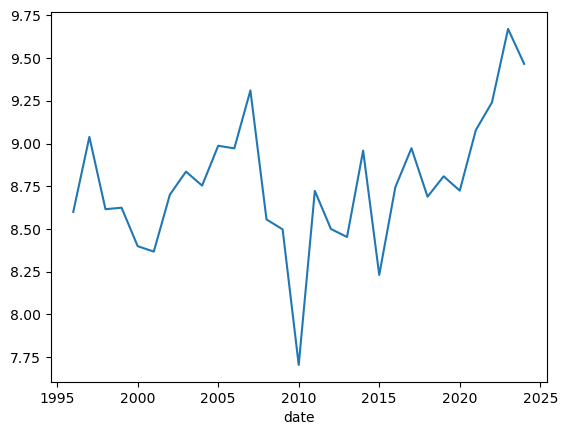

In [67]:
mean_temp_by_year.plot()
plt.show()

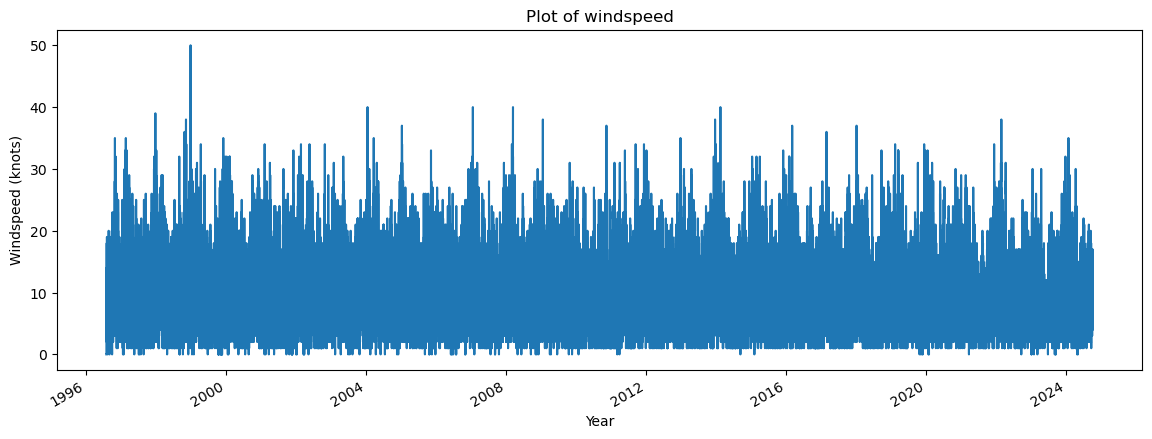

In [68]:
# Plot the windspeed
fig, ax = plt.subplots(figsize = (14, 5))
weather_df['wdsp'].plot()
plt.xlabel('Year')
plt.ylabel('Windspeed (knots)')
plt.title('Plot of windspeed')
plt.show()

In [69]:
# Rolling wdsp
rolling_wind = daily['wdsp'].rolling('24h').mean()
rolling_wind

date        date               
1996-07-31  1996-07-31 08:00:00    0.000000
            1996-07-31 09:00:00    0.000000
            1996-07-31 10:00:00    0.000000
            1996-07-31 11:00:00    0.000000
            1996-07-31 12:00:00    0.000000
                                     ...   
2024-09-30  2024-09-30 20:00:00    7.523810
            2024-09-30 21:00:00    7.409091
            2024-09-30 22:00:00    7.347826
            2024-09-30 23:00:00    7.291667
2024-10-01  2024-10-01 00:00:00    6.000000
Name: wdsp, Length: 246879, dtype: float64

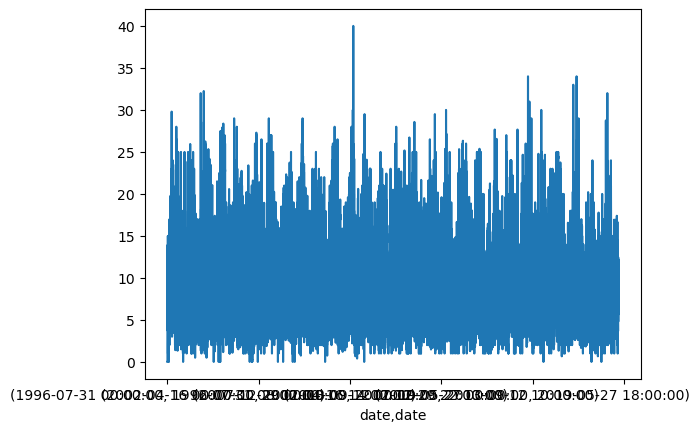

In [70]:
rolling_wind.plot()
plt.show()
# Horrendous

In [71]:
# Max windspeed for each day
max_daily_windspeed = daily['wdsp'].max()

max_daily_windspeed

date
1996-07-31     0
1996-08-01    14
1996-08-02    13
1996-08-03    10
1996-08-04    18
              ..
2024-09-27    15
2024-09-28     8
2024-09-29    17
2024-09-30    12
2024-10-01     6
Freq: D, Name: wdsp, Length: 10290, dtype: int32

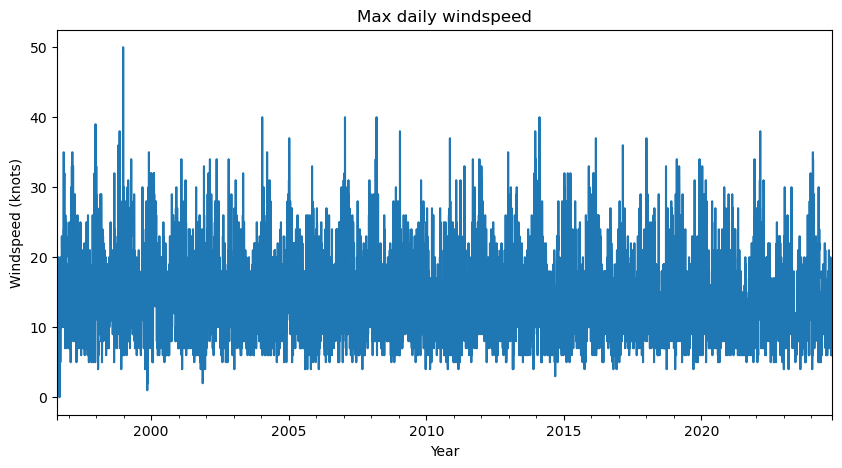

In [72]:
fig, ax = plt.subplots(figsize = (10, 5))
max_daily_windspeed.plot()
plt.xlabel('Year')
plt.ylabel('Windspeed (knots)')
plt.title('Max daily windspeed')
plt.show()

In [73]:
max_daily_windspeed = pd.DataFrame(max_daily_windspeed)
max_daily_windspeed

,wdsp
date,
1996-07-31,0
1996-08-01,14
1996-08-02,13
1996-08-03,10
1996-08-04,18
...,...
2024-09-27,15
2024-09-28,8
2024-09-29,17


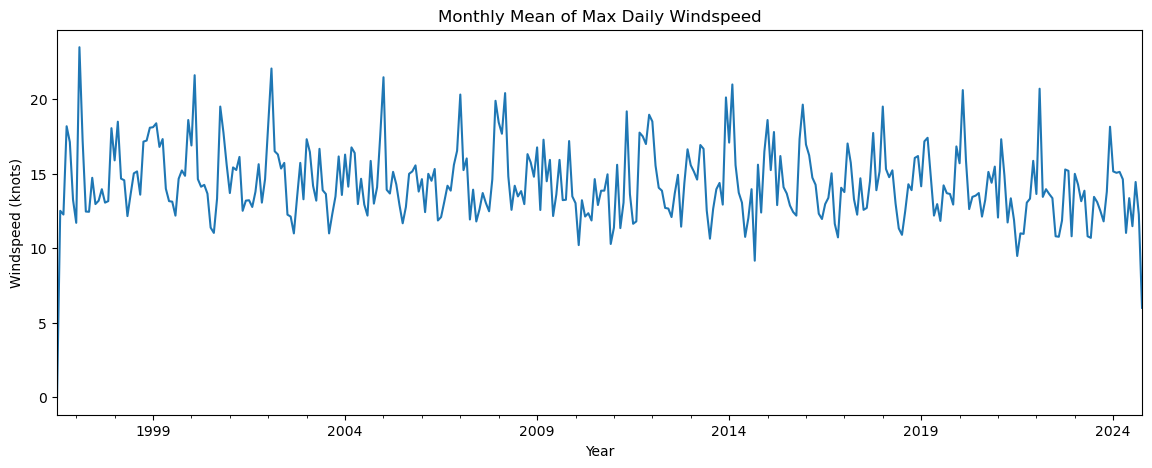

In [74]:
# Monthly mean of the daily max windspeeds

monthly_mean = max_daily_windspeed.resample('ME')

monthly_mean_max_wdsp = monthly_mean['wdsp'].mean()

fig, ax = plt.subplots(figsize = (14, 5))
monthly_mean_max_wdsp.plot()
plt.xlabel('Year')
plt.ylabel('Windspeed (knots)')
plt.title('Monthly Mean of Max Daily Windspeed')
plt.show()

In [75]:
index_month = monthly_mean.index.month
wind_mean_by_month = monthly_mean_max_wdsp.groupby(index_month).mean()
wind_mean_by_month.plot()

AttributeError: 'DatetimeIndexResampler' object has no attribute 'index'

In [ ]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 11,9
decomposition = sm.tsa.seasonal_decompose(weather_df)
fig = decomposition.plot()
plt.show()

End

***